In [1]:
import cv2
import numpy as np

# Load the blurred image
image = cv2.imread("reconstructed_background_exp2.jpg")

# Create a sharpening kernel
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

# Apply the sharpening filter
sharpened = cv2.filter2D(image, -1, sharpen_kernel)

# Remove noise from the sharpened image
deblurred = cv2.fastNlMeansDenoisingColored(sharpened, None, 10, 10, 7, 21)

# Display the result
cv2.imshow('Deblurred Image', deblurred)
cv2.waitKey(0)
cv2.destroyAllWindows()


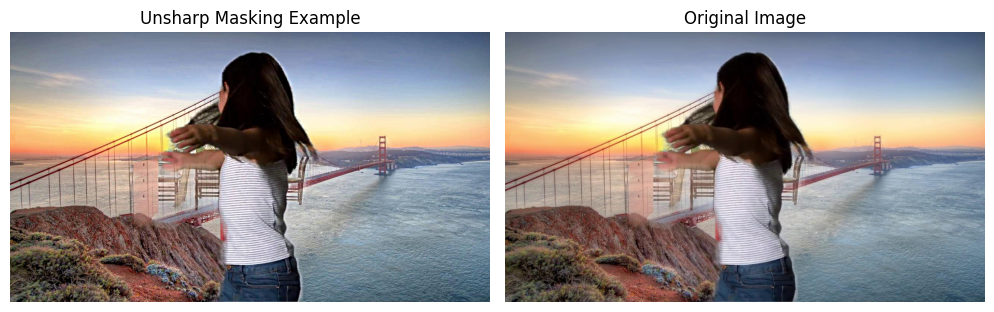

In [2]:
from truesight.util import load_background, show_images
path = "videos/2_i_kitchen_bridge_mp/fr_0007.jpeg"
import cv2

img = load_background(path)
gauss = cv2.GaussianBlur(img, (0,0), sigmaX=5)
unsharp = cv2.addWeighted(img, 1.5, gauss, -0.5, 0)
show_images([unsharp, img], ["Unsharp Masking Example", "Original Image"])

In [5]:
# from scipy.__config__ import show
# from skimage import restoration
# import numpy as np

# # e.g. a simple motion‐blur PSF
# psf = np.ones((5,5)) / 25
# # blurred = your gray or RGB (float in [0,1])
# deblur = restoration.richardson_lucy(img, psf, num_iter=30)
# show_images([deblur, img], ["Deblurred Image", "Original Image"])

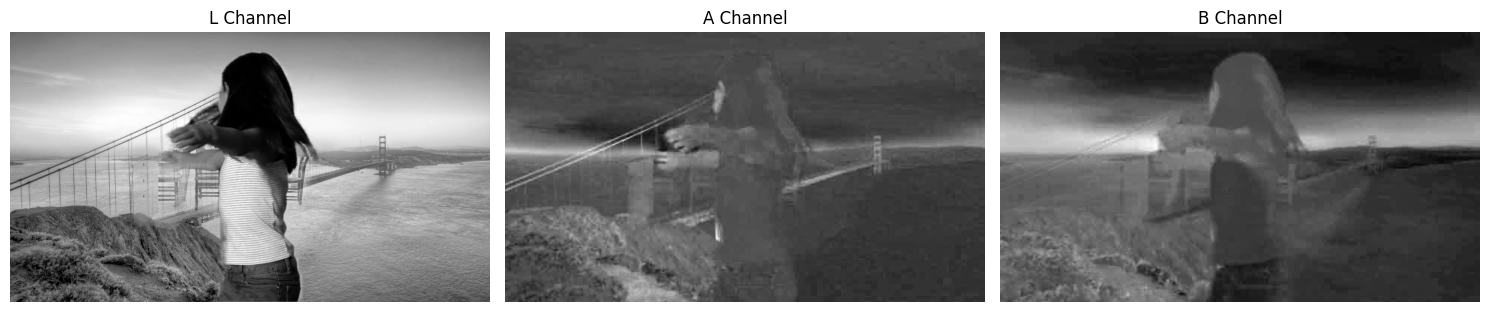

In [6]:
# convert image to lab color space
from skimage import color
lab = color.rgb2lab(img[:,:,::-1])
from truesight.util import show_images
# display the L channel
from skimage import exposure
l_channel = lab[:,:,0]
l_channel = exposure.rescale_intensity(l_channel, in_range=(0, 100), out_range=(0, 255))
a_channel = lab[:,:,1]
a_channel = exposure.rescale_intensity(a_channel, in_range=(-128, 127), out_range=(0, 255))
b_channel = lab[:,:,2]
b_channel = exposure.rescale_intensity(b_channel, in_range=(-128, 127), out_range=(0, 255))
# plot all three channels
show_images([l_channel, a_channel, b_channel], ["L Channel", "A Channel", "B Channel"])



In [ ]:
from colour import delta_E


# calculate delta_E



